In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
eurusd = pd.read_csv("data/EURUSD_daily.csv", index_col='Date')

In [3]:
eurusd.index = pd.to_datetime(eurusd.index)

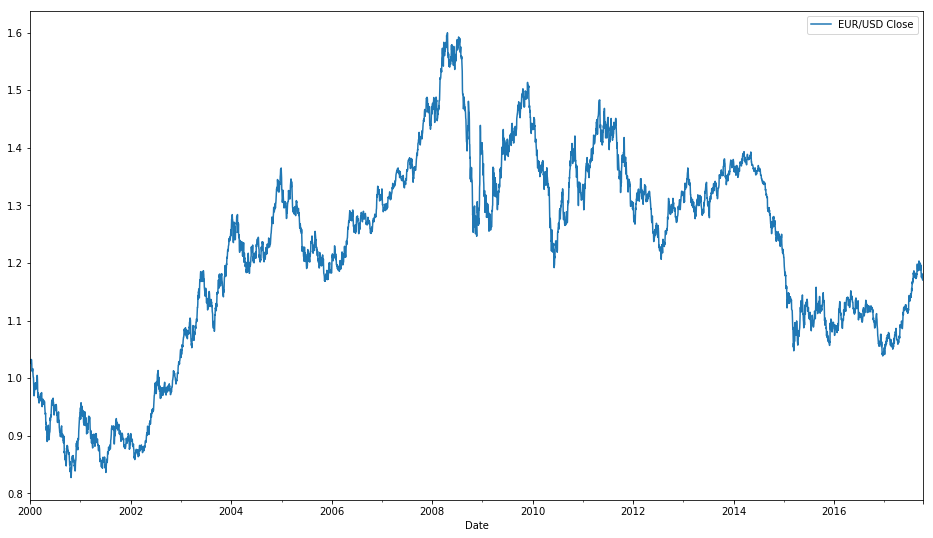

In [4]:
eurusd.plot(figsize=(16,9))

In [5]:
split_date = pd.Timestamp('10-10-2016')

In [6]:
train = eurusd.loc[:split_date]
test = eurusd.loc[split_date:]

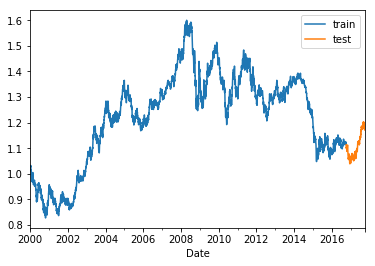

In [7]:
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [8]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [9]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [10]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [11]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index = train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index = test.index)
train_sc_df.head()

,Scaled
Date,
2000-01-03,0.259034
2000-01-04,0.262013
2000-01-05,0.264344
2000-01-06,0.262013
2000-01-07,0.259940


In [12]:
for s in range(1,21):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

In [13]:
train_sc_df.head(21)

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,...,shift_11,shift_12,shift_13,shift_14,shift_15,shift_16,shift_17,shift_18,shift_19,shift_20
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.259034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,0.262013,0.259034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,0.264344,0.262013,0.259034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,0.262013,0.264344,0.262013,0.259034,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,0.259940,0.262013,0.264344,0.262013,0.259034,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,0.256443,0.259940,0.262013,0.264344,0.262013,0.259034,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-11,0.265510,0.256443,0.259940,0.262013,0.264344,0.262013,0.259034,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-12,0.263696,0.265510,0.256443,0.259940,0.262013,0.264344,0.262013,0.259034,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-13,0.256573,0.263696,0.265510,0.256443,0.259940,0.262013,0.264344,0.262013,0.259034,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [15]:
#converts to numpy array
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values

In [16]:
X_train_t = X_train.reshape(X_train.shape[0], 1, 20)
X_test_t = X_test.reshape(X_test.shape[0], 1, 20)

In [17]:
from keras.layers import LSTM

In [18]:
K.clear_session()
model = Sequential()

model.add(LSTM(6, input_shape=(1, 20)))


model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

In [20]:
model.fit(X_train_t, y_train, epochs=100,
          batch_size=1, verbose=1, callbacks=[early_stop])

Epoch 1/100
4356/4356 [==============================] - 12s - loss: 0.0030    
Epoch 2/100
4356/4356 [==============================] - 11s - loss: 4.1715e-04    
Epoch 3/100
4356/4356 [==============================] - 11s - loss: 3.3103e-04    
Epoch 4/100
4356/4356 [==============================] - 12s - loss: 2.9683e-04    
Epoch 5/100
4356/4356 [==============================] - 12s - loss: 2.8335e-04    
Epoch 6/100
4356/4356 [==============================] - 12s - loss: 2.6092e-04    
Epoch 7/100
4356/4356 [==============================] - 12s - loss: 2.4676e-04    
Epoch 8/100
4356/4356 [==============================] - 12s - loss: 2.3341e-04    
Epoch 9/100
4356/4356 [==============================] - 12s - loss: 2.2249e-04    
Epoch 10/100
4356/4356 [==============================] - 12s - loss: 2.1933e-04    
Epoch 11/100
4356/4356 [==============================] - 12s - loss: 2.1128e-04    
Epoch 12/100
4356/4356 [==============================] - 12s - loss: 2.0014e-

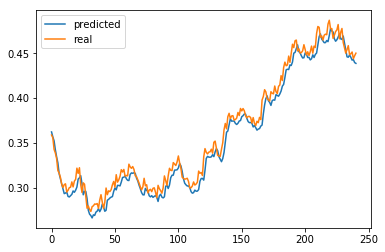

In [23]:
y_pred = model.predict(X_test_t)
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(['predicted', 'real'])

In [24]:
X_train_t = X_train.reshape(X_train.shape[0],20,1)
X_test_t = X_test.reshape(X_test.shape[0],20,1)

In [25]:
K.clear_session()
model = Sequential()

model.add(LSTM(8, input_shape=(20, 1)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [26]:
model.fit(X_train_t, y_train, epochs=100, batch_size=1, verbose=1,callbacks=[early_stop])

Epoch 1/100
4356/4356 [==============================] - 57s - loss: 0.0041    
Epoch 2/100
4356/4356 [==============================] - 57s - loss: 0.0013    
Epoch 3/100
4356/4356 [==============================] - 57s - loss: 7.8916e-04    
Epoch 4/100
4356/4356 [==============================] - 58s - loss: 6.5802e-04    
Epoch 5/100
4356/4356 [==============================] - 59s - loss: 6.0477e-04    
Epoch 6/100
4356/4356 [==============================] - 59s - loss: 5.7820e-04    
Epoch 7/100
4356/4356 [==============================] - 59s - loss: 5.7989e-04    
Epoch 8/100
4356/4356 [==============================] - 58s - loss: 5.2769e-04    
Epoch 9/100
4356/4356 [==============================] - 59s - loss: 5.1355e-04    
Epoch 10/100
4356/4356 [==============================] - 59s - loss: 4.9609e-04    
Epoch 11/100
4356/4356 [==============================] - 59s - loss: 4.6824e-04    
Epoch 12/100
4356/4356 [==============================] - 59s - loss: 4.8189e-04  

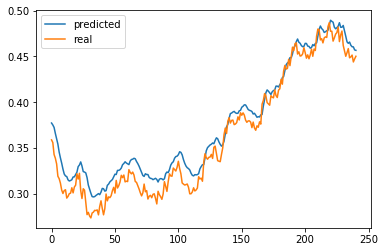

In [27]:
y_pred = model.predict(X_test_t)
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(['predicted', 'real'])

In [29]:
import h5py

In [32]:
model.save_weights("model.h5")

ImportError: `save_weights` requires h5py.

In [33]:
json_model = model.to_json()

In [34]:
with open("model.json", "w") as json_file:
    json_file.write(json_model)